C:\Users\vedan\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


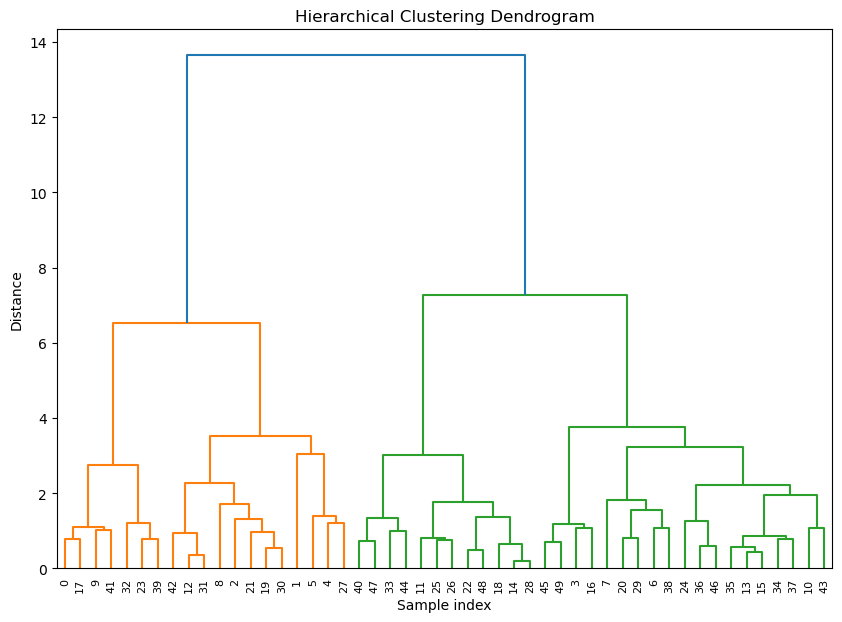

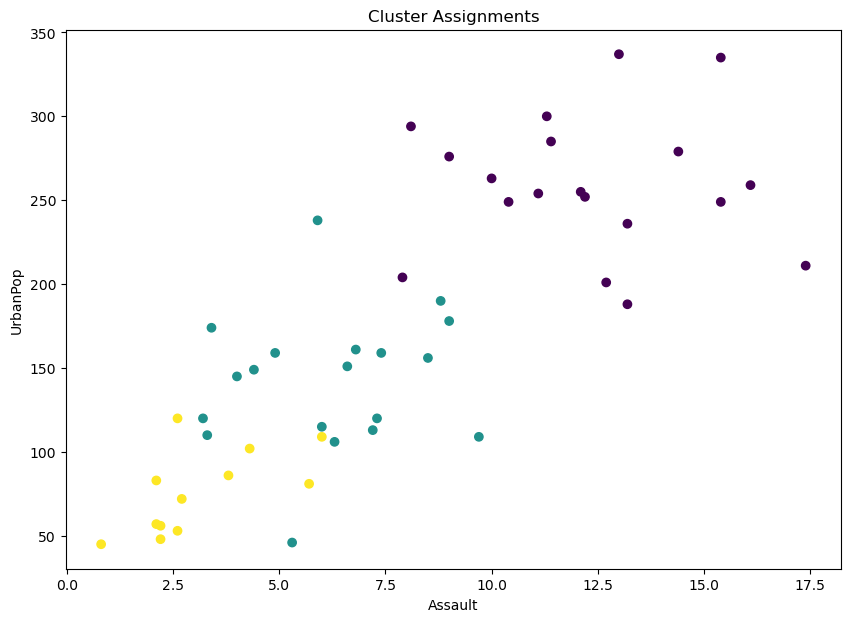

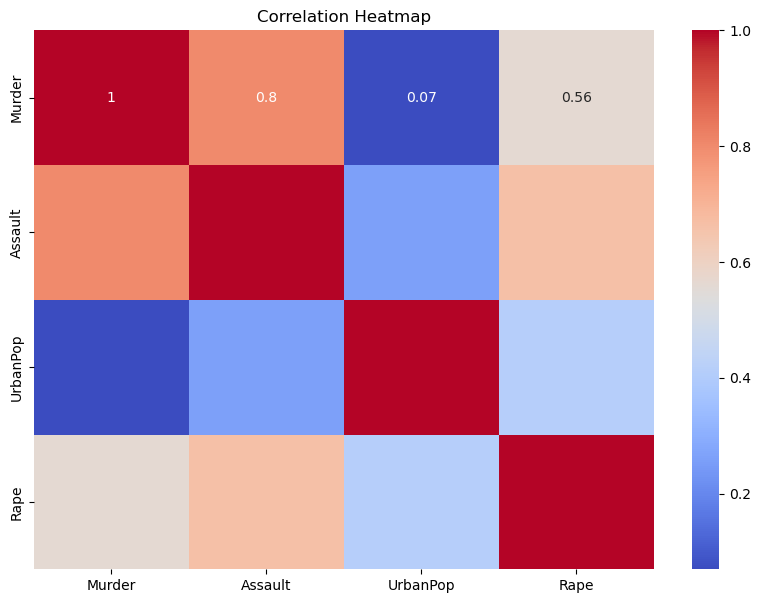

Silhouette Score: 0.31036358174027895
Davies-Bouldin Score: 1.0681318857436237


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Add import statement for Seaborn
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Load the data
crime_data = pd.read_csv('crime_data.csv')

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crime_data.iloc[:,1:])

# Perform hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_assignments = cluster.fit_predict(scaled_data)

# Plot dendrogram
plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
dendrogram(linkage(scaled_data, method='ward'))
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

# Plot cluster assignments
plt.figure(figsize=(10, 7))
plt.scatter(crime_data.iloc[:,1], crime_data.iloc[:,2], c=cluster_assignments, cmap='viridis')
plt.xlabel("Assault")
plt.ylabel("UrbanPop")
plt.title("Cluster Assignments")
plt.show()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(crime_data.iloc[:,1:].corr(), annot=True, cmap='coolwarm')  # Corrected line
plt.title("Correlation Heatmap")
plt.show()

# Evaluate clustering
silhouette_score = metrics.silhouette_score(scaled_data, cluster_assignments)
davies_bouldin_score = metrics.davies_bouldin_score(scaled_data, cluster_assignments)

print(f"Silhouette Score: {silhouette_score}")
print(f"Davies-Bouldin Score: {davies_bouldin_score}")


In [7]:
!pip install --upgrade scikit-learn


  Using cached scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl (10.6 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


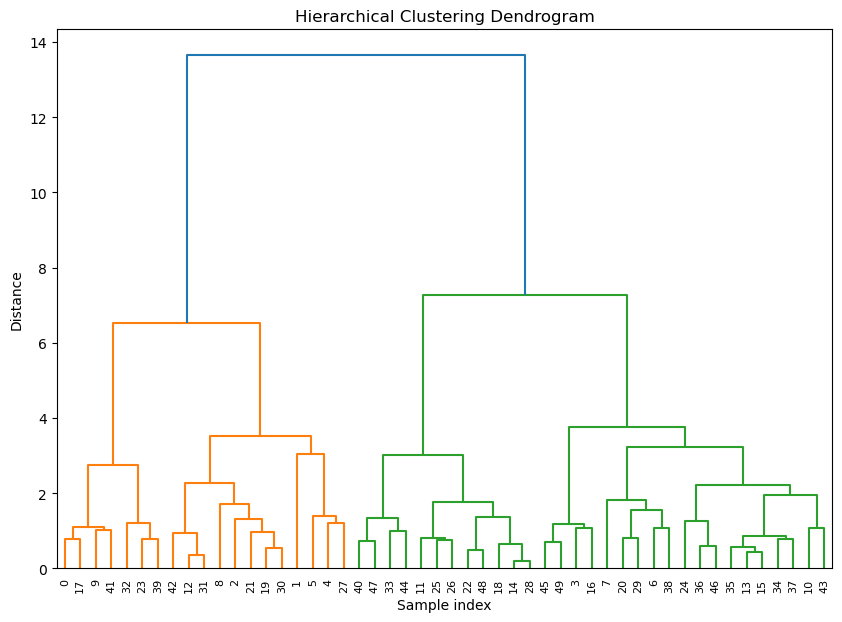

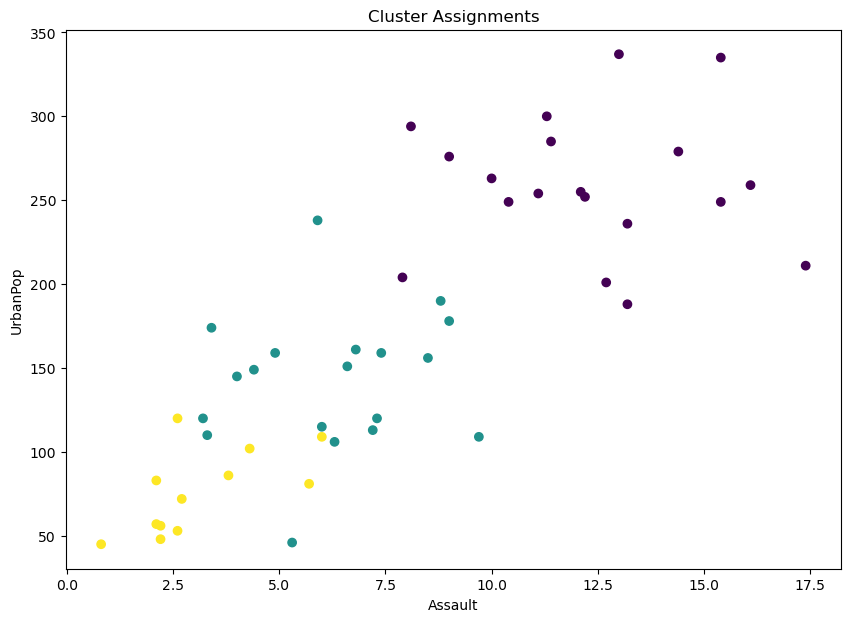

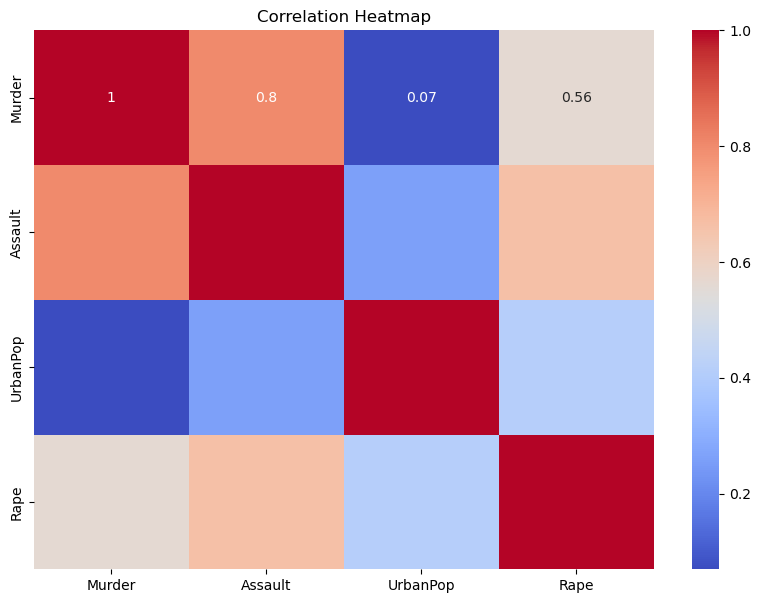

Silhouette Score: 0.31036358174027895
Davies-Bouldin Score: 1.0681318857436237


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Add import statement for Seaborn
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Load the data
crime_data = pd.read_csv('crime_data.csv')

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crime_data.iloc[:,1:])

# Perform hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster_assignments = cluster.fit_predict(scaled_data)

# Plot dendrogram
plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
dendrogram(linkage(scaled_data, method='ward'))
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

# Plot cluster assignments
plt.figure(figsize=(10, 7))
plt.scatter(crime_data.iloc[:,1], crime_data.iloc[:,2], c=cluster_assignments, cmap='viridis')
plt.xlabel("Assault")
plt.ylabel("UrbanPop")
plt.title("Cluster Assignments")
plt.show()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(crime_data.iloc[:,1:].corr(), annot=True, cmap='coolwarm')  # Corrected line
plt.title("Correlation Heatmap")
plt.show()

# Evaluate clustering
silhouette_score = metrics.silhouette_score(scaled_data, cluster_assignments)
davies_bouldin_score = metrics.davies_bouldin_score(scaled_data, cluster_assignments)

print(f"Silhouette Score: {silhouette_score}")
print(f"Davies-Bouldin Score: {davies_bouldin_score}")


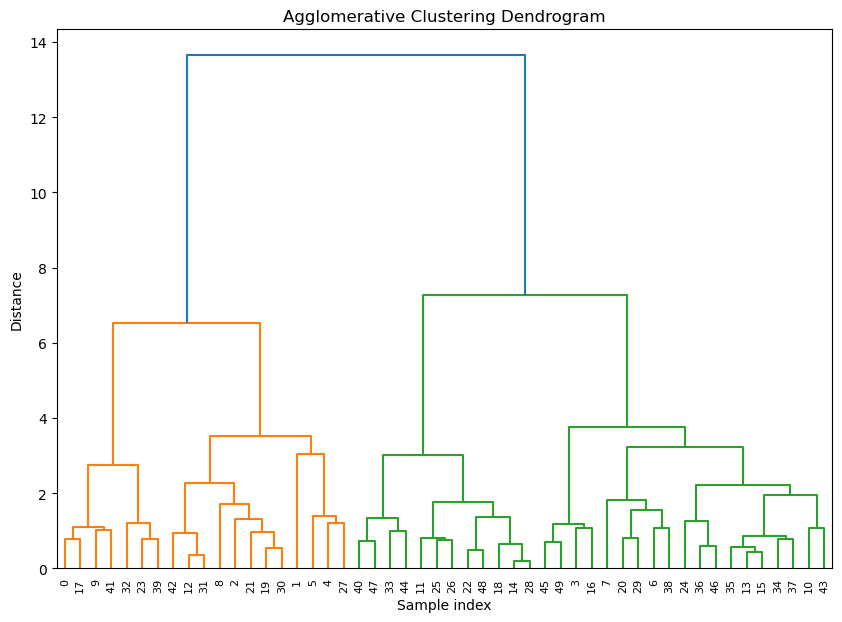

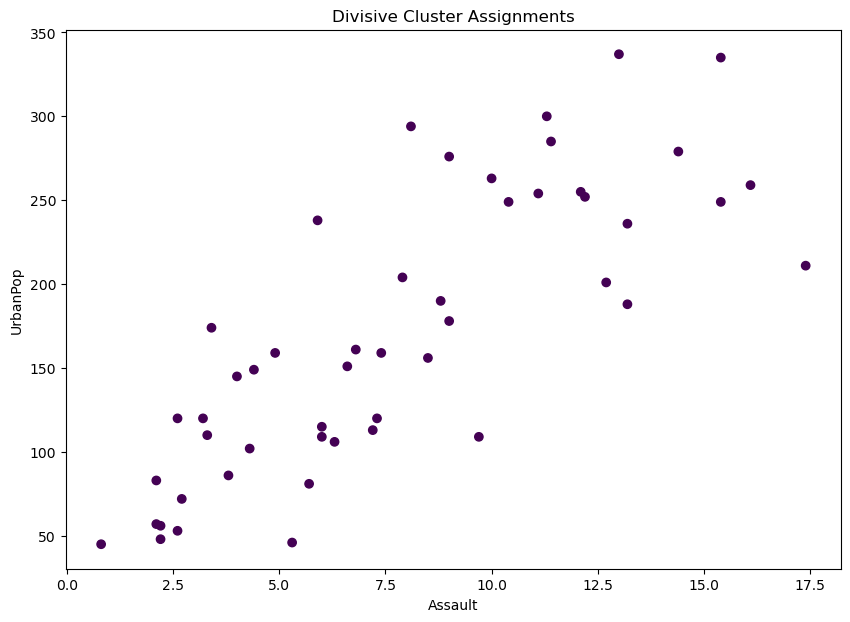

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Load the data
crime_data = pd.read_csv('crime_data.csv')

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crime_data.iloc[:,1:])

# Define divisive clustering function
def divisive_clustering(X, n_clusters):
    linkage_matrix = linkage(X, method='ward')
    cluster_assignments = [0] * len(X)
    for i in range(len(X)-n_clusters):
        max_dist_idx = np.argmax(linkage_matrix[:, 2])
        cluster1_idx = int(linkage_matrix[max_dist_idx, 0])
        cluster2_idx = int(linkage_matrix[max_dist_idx, 1])
        for j in range(len(X)):
            if cluster_assignments[j] == cluster2_idx:
                cluster_assignments[j] = cluster1_idx
        linkage_matrix = np.delete(linkage_matrix, max_dist_idx, axis=0)
    return cluster_assignments

# Perform divisive clustering
divisive_assignments = divisive_clustering(scaled_data, 3)

# Plot dendrogram for agglomerative clustering
plt.figure(figsize=(10, 7))
plt.title("Agglomerative Clustering Dendrogram")
dendrogram(linkage(scaled_data, method='ward'))
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

# Plot cluster assignments for divisive clustering
plt.figure(figsize=(10, 7))
plt.scatter(crime_data.iloc[:,1], crime_data.iloc[:,2], c=divisive_assignments, cmap='viridis')
plt.xlabel("Assault")
plt.ylabel("UrbanPop")
plt.title("Divisive Cluster Assignments")
plt.show()


In [1]:
## clustering with k means

In [2]:
import pandas as pd

# Load the data
crime_data = pd.read_csv('crime_data.csv')

# Display the first few rows of the dataframe
print(crime_data.head())


   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


C:\Users\vedan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


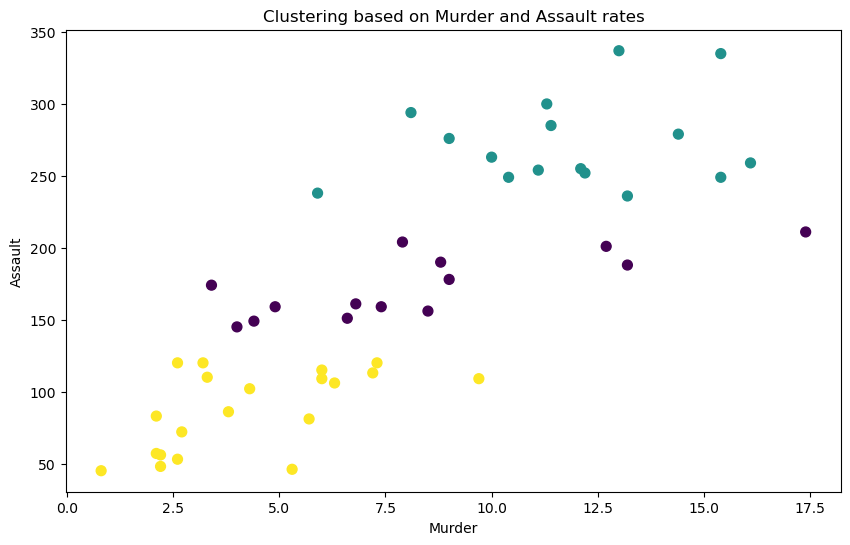

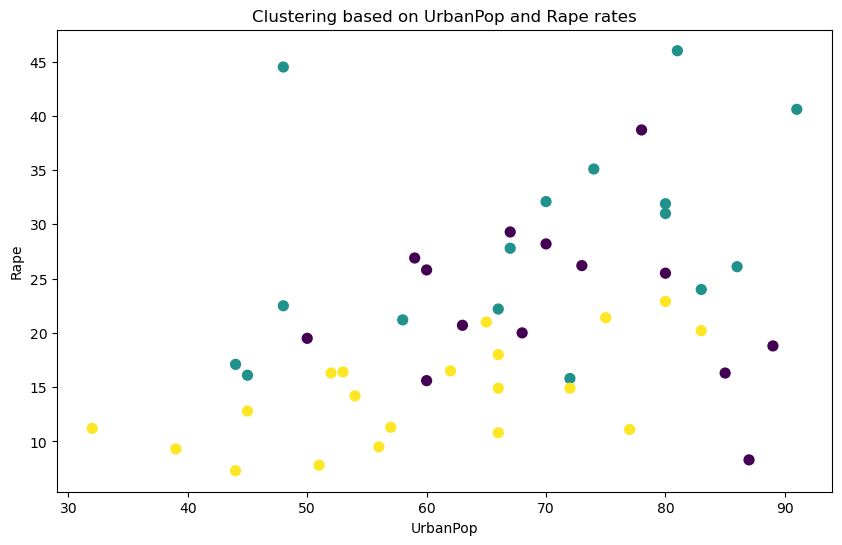

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract the features for clustering
X = crime_data[['Murder', 'Assault', 'UrbanPop', 'Rape']]

# Initialize the KMeans model with the desired number of clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X)

# Add cluster labels to the original dataframe
crime_data['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))

# Plot clusters based on Murder and Assault rates
plt.scatter(crime_data['Murder'], crime_data['Assault'], c=crime_data['Cluster'], cmap='viridis', s=50)
plt.title('Clustering based on Murder and Assault rates')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()

# Plot clusters based on UrbanPop and Rape rates
plt.figure(figsize=(10, 6))
plt.scatter(crime_data['UrbanPop'], crime_data['Rape'], c=crime_data['Cluster'], cmap='viridis', s=50)
plt.title('Clustering based on UrbanPop and Rape rates')
plt.xlabel('UrbanPop')
plt.ylabel('Rape')
plt.show()


C:\Users\vedan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vedan\AppData\Local\Temp\ipykernel_11140\3707459419.py:22: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vedan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vedan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to

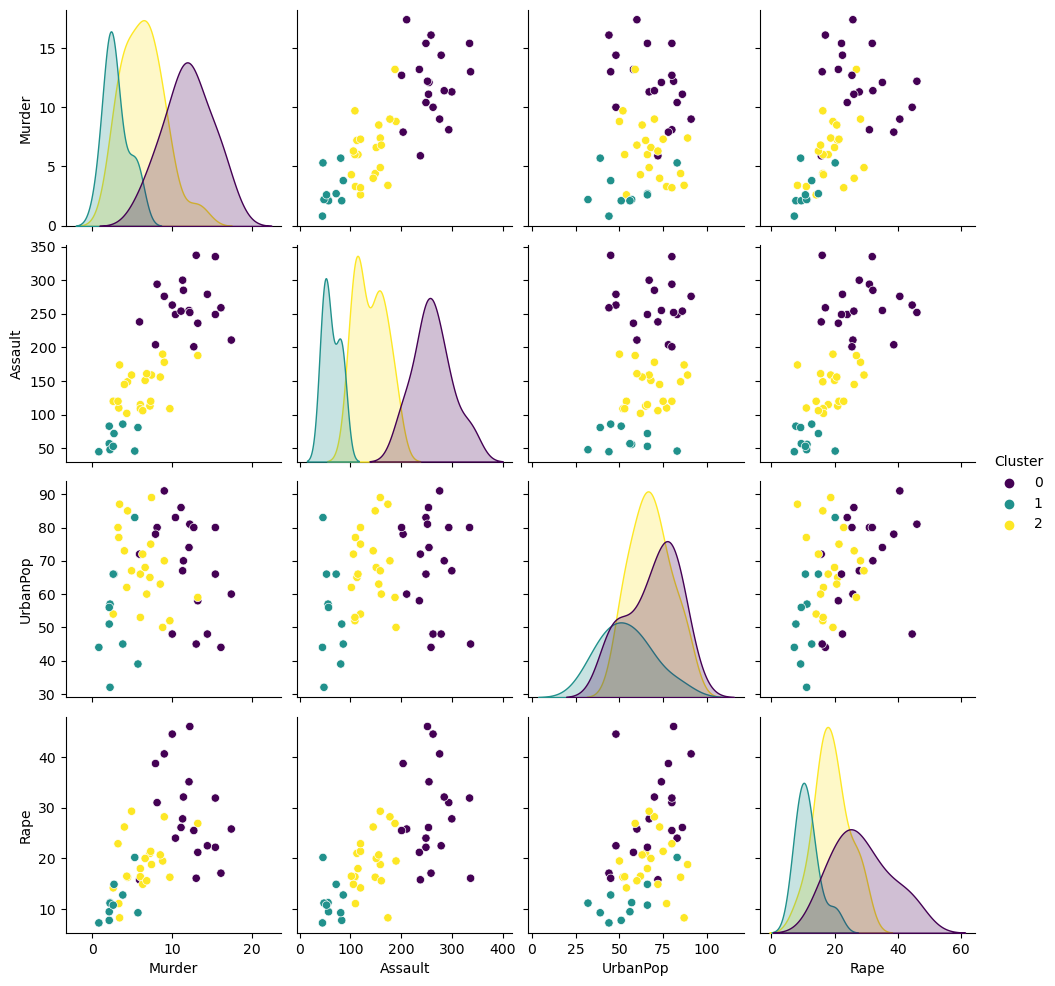

      Murder     Assault   UrbanPop       Rape     Cluster
0  11.947368  261.947368  69.000000  28.631579  Centroid 1
1   2.950000   62.700000  53.900000  11.510000  Centroid 2
2   6.328571  139.714286  67.952381  19.166667  Centroid 3


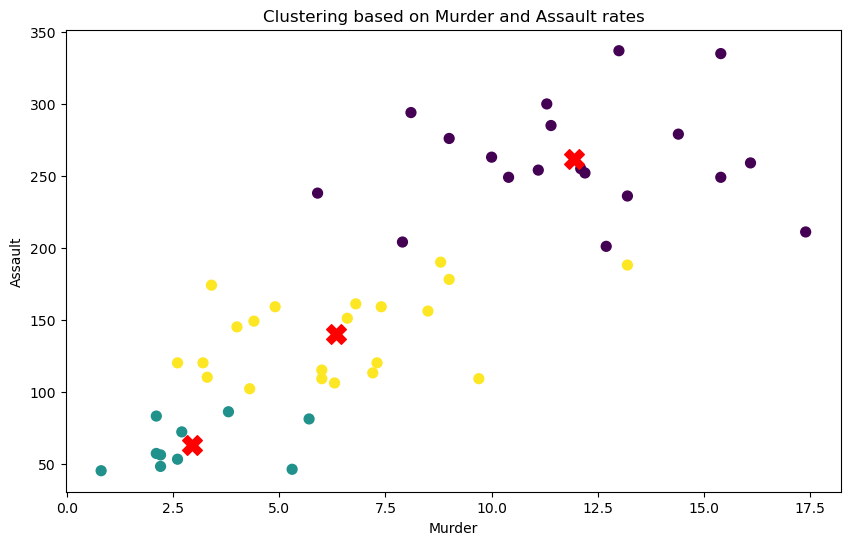

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the data
crime_data = pd.read_csv('crime_data.csv')

# Extract the features for clustering
X = crime_data[['Murder', 'Assault', 'UrbanPop', 'Rape']]

# Initialize the KMeans model with the desired number of clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X)

# Add cluster labels to the original dataframe
crime_data['Cluster'] = kmeans.labels_

# Pairplot
with pd.option_context('mode.use_inf_as_na', True):
    sns.pairplot(crime_data, hue='Cluster', palette='viridis', diag_kind='kde')
plt.show()

# Cluster Centroids
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=['Murder', 'Assault', 'UrbanPop', 'Rape'])
centroid_df['Cluster'] = ['Centroid {}'.format(i+1) for i in range(len(centroids))]
print(centroid_df)

# Cluster Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(crime_data['Murder'], crime_data['Assault'], c=crime_data['Cluster'], cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red')
plt.title('Clustering based on Murder and Assault rates')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()


In [6]:
##DBSCAN in clustering

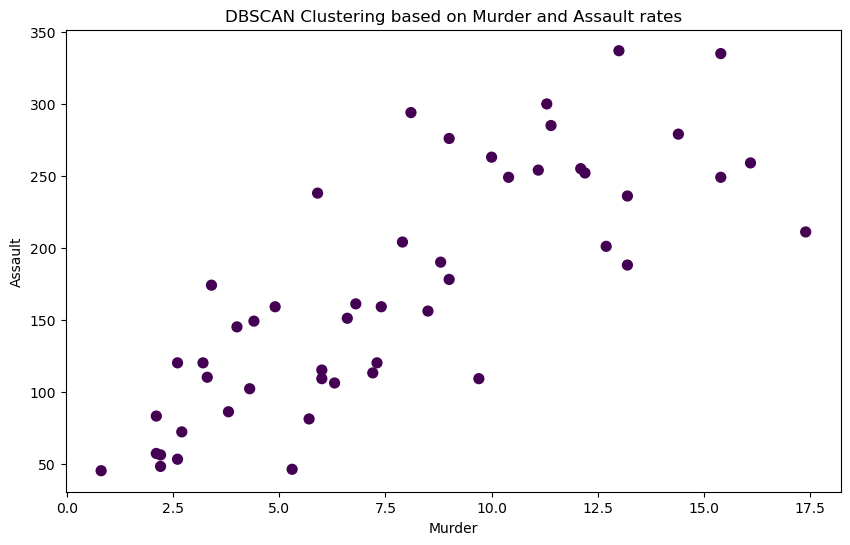

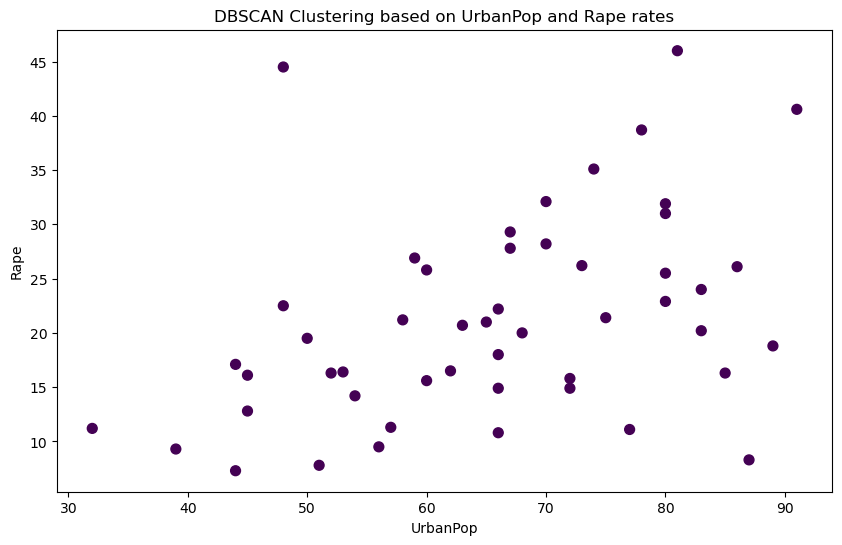

In [7]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the data
crime_data = pd.read_csv('crime_data.csv')

# Extract the features for clustering
X = crime_data[['Murder', 'Assault', 'UrbanPop', 'Rape']]

# Initialize the DBSCAN model with epsilon and min_samples parameters
epsilon = 0.5  # adjust according to your data
min_samples = 5  # adjust according to your data
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Fit the model to the data
dbscan.fit(X)

# Add cluster labels to the original dataframe
crime_data['Cluster'] = dbscan.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))

# Plot clusters based on Murder and Assault rates
plt.scatter(crime_data['Murder'], crime_data['Assault'], c=crime_data['Cluster'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering based on Murder and Assault rates')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()

# Plot clusters based on UrbanPop and Rape rates
plt.figure(figsize=(10, 6))
plt.scatter(crime_data['UrbanPop'], crime_data['Rape'], c=crime_data['Cluster'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering based on UrbanPop and Rape rates')
plt.xlabel('UrbanPop')
plt.ylabel('Rape')
plt.show()


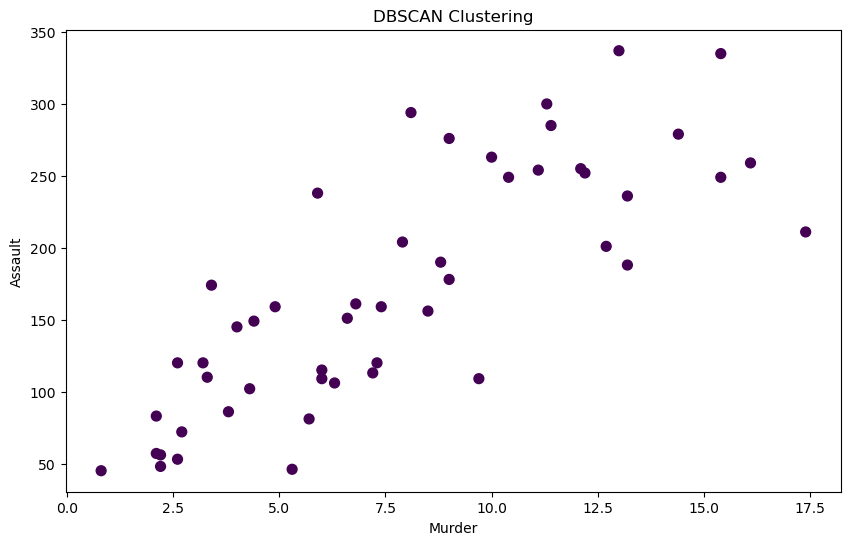

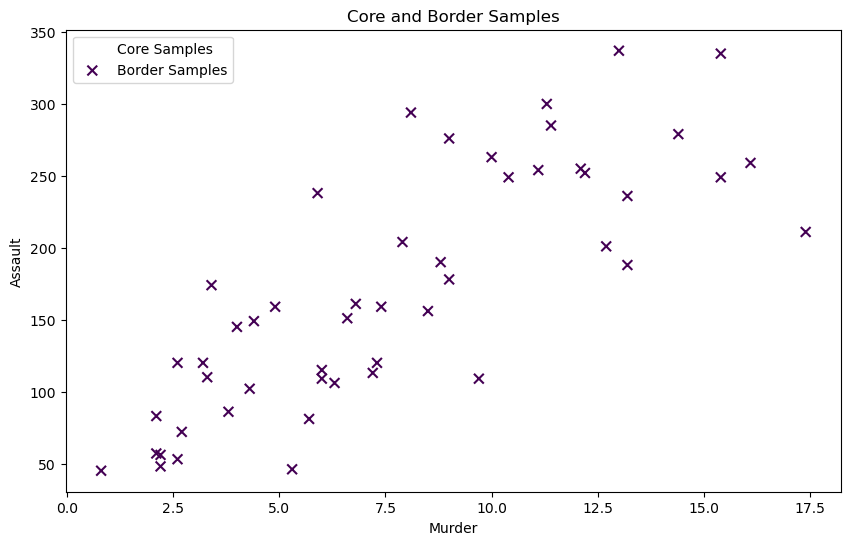

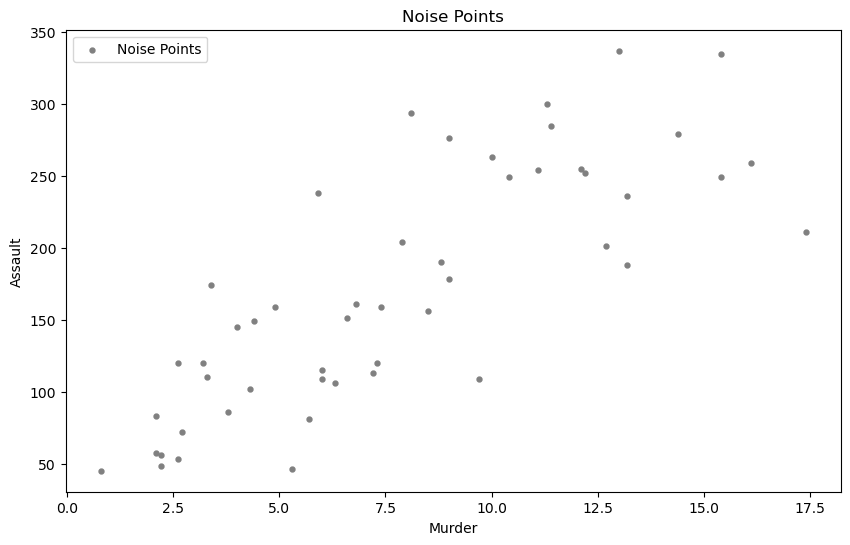

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter Plot with Clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['Murder'], X['Assault'], c=dbscan.labels_, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()

# Core Samples and Border Samples
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

plt.figure(figsize=(10, 6))
plt.scatter(X['Murder'][core_samples_mask], X['Assault'][core_samples_mask], c=labels[core_samples_mask], cmap='viridis', s=50, marker='o', label='Core Samples')
plt.scatter(X['Murder'][~core_samples_mask], X['Assault'][~core_samples_mask], c=labels[~core_samples_mask], cmap='viridis', s=50, marker='x', label='Border Samples')
plt.title('Core and Border Samples')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.legend()
plt.show()

# Noise Points
plt.figure(figsize=(10, 6))
plt.scatter(X['Murder'][labels == -1], X['Assault'][labels == -1], c='gray', s=50, marker='.', label='Noise Points')
plt.title('Noise Points')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.legend()
plt.show()
